In [2]:
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
import matplotlib.pyplot as plt
import io
import pandas as pd
import numpy as np
%matplotlib inline

In [46]:
concated = pd.read_csv('C:/Users/riznet/volgabassin/concated2.csv')

In [259]:
concated.drop(['14'],1, inplace=True)

In [264]:

concated

,type,name,folow_to,length_km,area_km²
0,Озеро,Красновское,река Большой Иргиз,"0,5",0
1,Река,Атмис,река АТМИСС,15,101
15,Река,"без названия, у с. Порзамка",река Клязьма,20,444
20,Река,"без названия, у с. Бычковский",река Березуйка,16,"90,2"
21,Река,Беспута,река Беспута,20,95
...,...,...,...,...,...
12483,Река,Сестра,река Дубна,138,2680
12485,Река,Волга,Каспийское море,3531,1360000
12486,Озеро,без названия,река Арда,"0,32",307
12487,Озеро,Ахмылово,река Волга,"0,84","21,8"


In [265]:
#stop words list
rem_list = ['река','озеро','водохранилище','водоток','ручьи', 'канал','пруд']
#replacement stop words
pat = r'\b(?:{})\b'.format('|'.join(rem_list))
#creating new col for generating grapf edges
concated['edge'] = concated['folow_to'].str.replace(pat,'')
#whitebar replace
concated = concated.applymap(lambda x: str(x).strip())

In [266]:
concated.groupby('edge').size().sort_values()

edge
1-я  Гуселка                             1
Пижуг                                    1
Печуга                                   1
Петруниха                                1
Петровский  Фердос  (Сухой  Фердос)      1
                                      ... 
УФА                                     89
вдхр  Горьковское                       91
Ик  (Большой  Ик)                      101
КАМА                                   155
Волга                                  830
Length: 2626, dtype: int64

In [375]:
concated.loc[concated['name'] == 'Волга']

,type,name,folow_to,length_km,area_km²,edge
12485,Река,Волга,Каспийское море,3531,1360000,Каспийское море


In [306]:
concated

,type,name,folow_to,length_km,area_km²,edge
0,Озеро,Красновское,река Большой Иргиз,"0,5",0,Большой Иргиз
1,Река,Атмис,река АТМИСС,15,101,АТМИСС
15,Река,"без названия, у с. Порзамка",река Клязьма,20,444,Клязьма
20,Река,"без названия, у с. Бычковский",река Березуйка,16,"90,2",Березуйка
21,Река,Беспута,река Беспута,20,95,Беспута
...,...,...,...,...,...,...
12483,Река,Сестра,река Дубна,138,2680,Дубна
12485,Река,Волга,Каспийское море,3531,1360000,Каспийское море
12486,Озеро,без названия,река Арда,"0,32",307,Арда
12487,Озеро,Ахмылово,река Волга,"0,84","21,8",Волга


In [348]:
list1 = concated['name'].loc[:500]
list2 = concated['edge'].loc[:500]

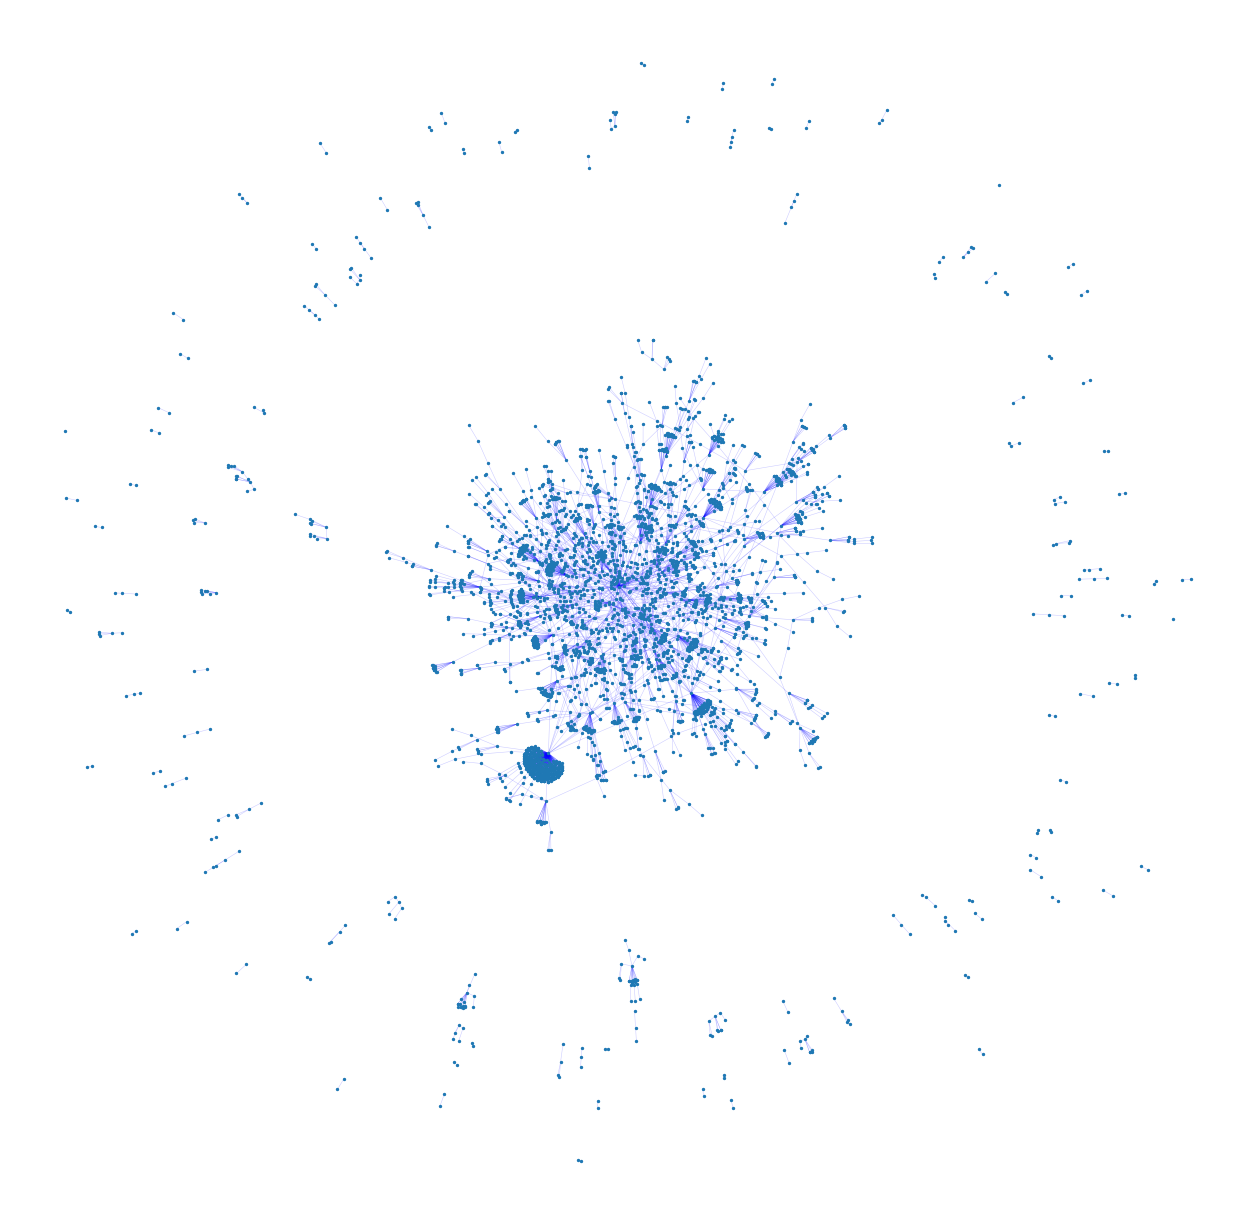

In [384]:

G = nx.Graph()

for i in list1.index:
    G.add_edges_from([(list1[i],list2[i])])

#pos = nx.spring_layout(G,iterations=100)  # positions for all nodes

pos = nx.spring_layout(G)

plt.figure(figsize=(20,20), dpi=80)
nx.draw_networkx_nodes(G, pos, node_size=4)
nx.draw_networkx_edges(G, pos, width=0.5, alpha=0.2, edge_color="b")

# labels
#nx.draw_networkx_labels(G, pos, font_size=5, font_family="sans-serif")
#plt.xlim(-0.5,0.5)
#plt.ylim(-0.5,0.5)
plt.axis("off")
plt.show()
#plt.savefig('riv_net.png', dpi=300, bbox_inches='tight')

In [8]:
gephi = pd.DataFrame()
riv = pd.read_csv('riv_net.csv')
gephi['source'] = riv['name']
gephi['target'] = riv['edge']
gephi['weight'] = riv['area_km²']
gephi['length'] = riv['length_km']
gephi.length = gephi.length.str.replace(',','.')
gephi.weight = gephi.weight.str.replace(',','.')
gephi.to_csv('gephi.csv')

In [9]:
gephi

,source,target,weight,length
0,Красновское,Большой Иргиз,0,0.5
1,Атмис,АТМИСС,101,15
2,"без названия, у с. Порзамка",Клязьма,444,20
3,"без названия, у с. Бычковский",Березуйка,90.2,16
4,Беспута,Беспута,95,20
...,...,...,...,...
10714,Сестра,Дубна,2680,138
10715,Волга,Каспийское море,1360000,3531
10716,без названия,Арда,307,0.32
10717,Ахмылово,Волга,21.8,0.84


In [55]:
lakes = pd.DataFrame()
lakes = concated.loc[concated['type'] == 'Озеро']


In [62]:
lakes.loc[lakes['river_bassin'] == 'Окский бассейновый округ (9)']

,Unnamed: 0,1,type,name,place,folow_to,bassin_district,river_bassin,river_subbassin,mg_area,10,length_km,area_km²,13,14,15
